# Clustering Methods


_Summarized by QH_  
_First version: 2022-11-02_  
_Last updated on : 2022-11-02_  

The objective for clustering is to find homogeneous subgroups among the observations.

## K-Means Clustering

K-Means clustering method can partition the datasets into $K$ distinct and non-overlapping segments/clusters. The idea of K-Means is to find a good way to partition the data that can make the _within-cluster variation_ as small as possible.

To define the _within-cluster variation_, the common way is to use Euclidean distance.
* Eclidean distance: $\sqrt{\sum_{j=1}^p (x_{ij} - x_{i'j})^2}$ for observation $i$ and $i'$.

And the _within-cluster variation_ for cluster $k$ is defined as the sum of Pair-wise squared Euclidean distance: 
$$ W(C_k) = \frac{1}{|C_k|} \sum_{i, i' \in C_k} \sum_{j=1}^p (x_{ij} - x_{i'j})^2$$  

where $|C_k|$ denotes the number of observations in the $k$ th cluster.

Our objective is to minimize for the total $K$ clusters' _within-cluster variation_, mathematically:
$$ \text{min}_{c_1, \cdots, c_k} \sum_{k=1}^KW(C_k) $$ 



The algorithm for a dataset with number of observations being $n$ and number of features being $p$:
1. Randomly initial $K$ _centroid_.
2. Iterate until the cluster assignments stop changing:  
    a. Assign each observation to the closest cluster centroid. Closest is measured using Euclidean distance.  
    b. For each of the $K$ clusters, compute the cluster _centroid_. The $k$th cluster centroid is the vector of $p$ features, for each feature value being the average of the observations' feature value in that cluster.

Notes:
* The algorithm gurantees to decrease the _within-cluster variation_ since each steps is to find the observation that's closest to each other. And mathematically it is because:
$$ \frac{1}{|C_k|} \sum_{i, i' \in C_k} \sum_{j=1}^p (x_{ij} - x_{i'j})^2 = 2\sum_{i \in C_k} \sum_{j=1}^p (x_{ij} - \bar{x}_{kj})^2$$ 
* It may get into local optimum given different initialization.

Advantages:
* Easy and straightforward to implement and understand

Drawbacks:
* Need to pre-specify number of clusters $K$. 
    * We can use __elbow method__ using sum of _within-cluster variation_ or _average silhoutte score_ to determine the $K$.
    * Use business knowledge together with mathematical methods to determine.
* Need to initialize the $K$ centroids which may results in different local optimum. 
    * Suggest to run multiple times with different initialization and choose the one that minimize the sum of _within-cluster variation_.

### Elbow method


## Agglomerative (Bottom-up) Hierarchical Clustering

### Understanding a dendrogram
* At the bottom of the tree represents individual observations (leafs). When we move up the tree, leaves begin to fuse into branches because they are similar to each other.
* The height of the fusion as measure on the vertical axis represents the dis-similarity of two clusters.
* The closeness in the horizontal axis does not represent the similarity.

### Main Idea and Dissimilarity

The main idea for the agglomerative hierarchical clustering is that 
* Starting out at the bottom of the dendrogram, each of the $n$ observations is treated as its own cluster. 
* The two clusters that are most similar to each other are then fused so that there now are $n−1$ clusters. 
* Next the two clusters that are most similar to each other are fused again, so that there now are $n − 2$ clusters. The algorithm proceeds in this fashion until all of the observations belong to one single cluster.

From this idea we need a measurement for similarity or dissimilarity. For two observations we can use Euclidean Distance, how about the dissimlarity between two clusters? We can use _linkage_.
There are four types of _linkage_: _complete_, _average_, _single_, and _centroid_.

|Linkage|Description|
|----|:--|
|Complete|Maximal intercluster dissimlarity. Compute all pairwise dissimlarities between observations in cluster A and the observations in cluster B and record the _largest_ of these dissimalrities|
|Single|Minimal intercluster dissimilarity. Compute all pariwise dissimilarities between observations in cluster A and the observations in cluster B and record the _smallest_ of these dissimilarities. Single linkage can result in extended, trailing clusters in which single observations are fused one-at-a-time.|
|Average|Mean intercluster dissimilarity. Compute all pariwise dissimilarities between observations in cluster A and the observations in cluster B and record the _average_ of these dissimilarities.|
|Centroid|Dissimilarity between the centroid for clusters A and the centroid for cluster B. Centroid linkage can result in undesirable _inversions_. An _inversion_ occur when two clusters are fused at a height below either of the individual clusters in the dendrogram.|

 ### Hierarchical Clustering Algorithm
 1. Treat each of the $n$ observation as its own cluster and record the dissimilarity measure (e.g. Euclidian distance) for all pairwise dissimilarity.
 2. For $i = n, n-1, \cdots, 2$:
    a. Examine all pairwise inter-cluster dissimilarities among the $i$ clusters and identify the pair of clusters that are most similar. Fuse these two clusters. The dissimilarity between these two clusters indicates the height in the dendrogram where the fusion takes place.  
    b. Compute the new pairwise inter-cluster dissimilarities among the $i-1$ remaining clusters.

Notes:
* Compared to K-Means, Hierarchical Clustering does not need to pre-specify number of clusters.
* Hierarchical clustering sets the assumption that clusters are netted. That means, if the clusters are not nested, using hierarchical clustering may yield wose results than K-Means clustering for a given number of clusters.
* Choice of dissimilarity measures:
    * Correlation-based dissimilarity measure is preferred to be used when the focus is on the shape of observation profiles instead of their magnitude. 
        * e.g. Using shoppers' historical shopping data to do segmentation. If the goal is to group them by their shopping preference (e.g., buying computers and office suplies together) then correlation-based dissimilarity measure is more appropriate.

Practical issues when doing clustering:
* Should the observations or features first be standardized some way? (e.g. scaled to standard deviation)
* Hierarchical clustering:
    * What dissimilarity measure should be used?
    * What type of linkage should be used?
    * Where should we cut the dendrogram in order to obtain clusters?
* K-Means Clustering:
    * How many clusters should we look for in the data?

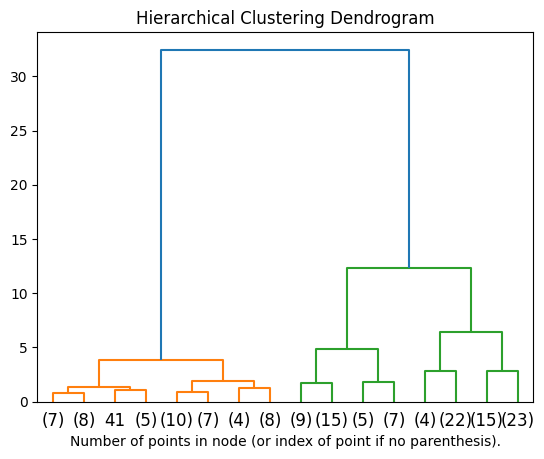

In [1]:
# This example is from scikit-learn 1.1.3 example:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# References
1. Introduction to Statistical Learning
2. Machine Learning Course by Andrew Ng on Coursera
3. Scikit-Learn Online Clustering documents